### 1. Import modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import umap
import umap.plot

### 2. Merge .pkl's

In [2]:
# Load data
X_zuigelingen_numericals = pd.read_pickle('../4_Data/Pickles/X_zuigelingen_notvaccinated_numericals.pkl')
X_zuigelingen_booleans = pd.read_pickle('../4_Data/Pickles/X_zuigelingen_notvaccinated_booleans.pkl')

In [3]:
X_zuigelingen_numericals.dtypes

gemiddelde_woz_waarde_woning                                                                     float64
ArbeidNettoarbeidsparticipatie_                                                                  float64
InkomenInkomen_van_huishoudens40_huishoudens_met_laagste_inkomen_                                float64
InkomenInkomen_van_huishoudens20_huishoudens_met_hoogste_inkomen_                                float64
InkomenInkomen_van_huishoudensHuishoudens_met_een_laag_inkomen_                                  float64
InkomenInkomen_van_huishoudensHuish_onder_of_rond_sociaal_minimum_                               float64
InkomenInkomen_van_huishoudensHuishoudens_tot_110_van_sociaal_minimum_                           float64
InkomenInkomen_van_huishoudensHuishoudens_tot_120_van_sociaal_minimum_                           float64
InkomenInkomen_van_huishoudensMediaan_vermogen_van_particuliere_huish_x_1_000_euro               float64
ZorgPercentage_jongeren_met_jeugdzorg_                 

In [4]:
X_zuigelingen_booleans.dtypes

percentage_geb_nederland_herkomst_nederland_70.0              bool
percentage_geb_nederland_herkomst_nederland_80.0              bool
percentage_geb_nederland_herkomst_nederland_90.0              bool
percentage_geb_nederland_herkomst_nederland_100.0             bool
percentage_geb_nederland_herkomst_nederland_nan               bool
percentage_geb_nederland_herkomst_overig_europa_0.0           bool
percentage_geb_nederland_herkomst_overig_europa_10.0          bool
percentage_geb_nederland_herkomst_overig_europa_nan           bool
percentage_geb_nederland_herkomst_buiten_europa_0.0           bool
percentage_geb_nederland_herkomst_buiten_europa_10.0          bool
percentage_geb_nederland_herkomst_buiten_europa_nan           bool
percentage_geb_buiten_nederland_herkomst_europa_0.0           bool
percentage_geb_buiten_nederland_herkomst_europa_10.0          bool
percentage_geb_buiten_nederland_herkomst_europa_20.0          bool
percentage_geb_buiten_nederland_herkomst_europa_nan           

### 3. UMAP - Visualization of numerical space

#### 3.1 Exploration

In [5]:
def draw_umap_numericals(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(X_zuigelingen_numericals)
    fig = plt.figure()
    point_size = 10
    color_code = (0.267004, 0.004874, 0.329415, 1.0)
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), s=point_size, c=[color_code])
    elif n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], s=point_size, c=[color_code])
    elif n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=point_size, c=[color_code])
    plt.title(title, fontsize=18)
    plt.show()

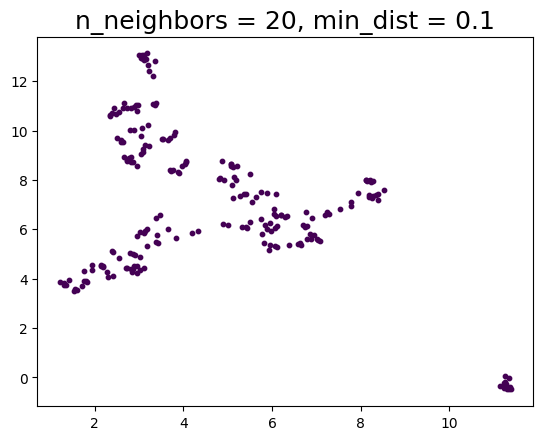

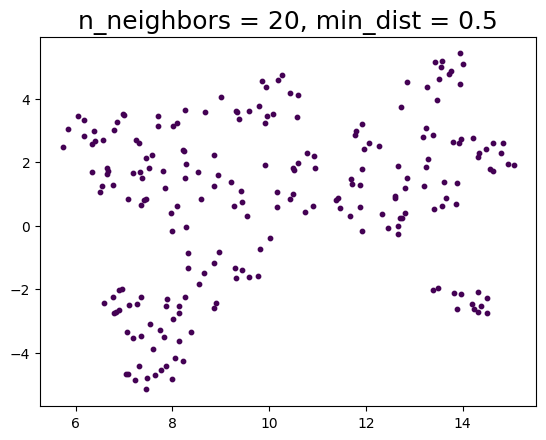

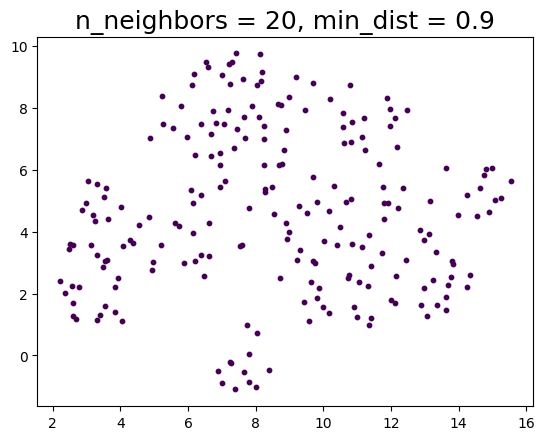

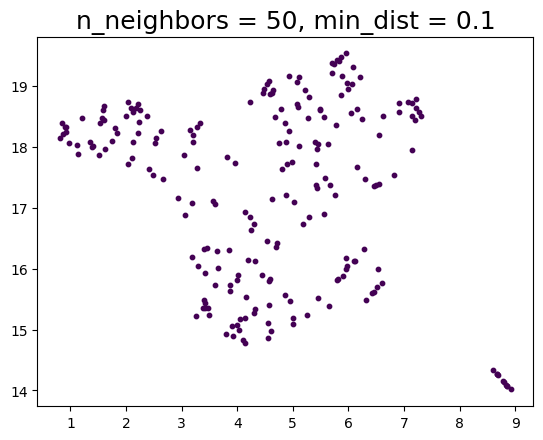

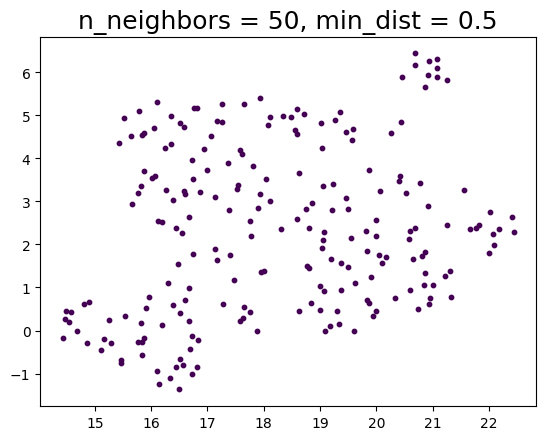

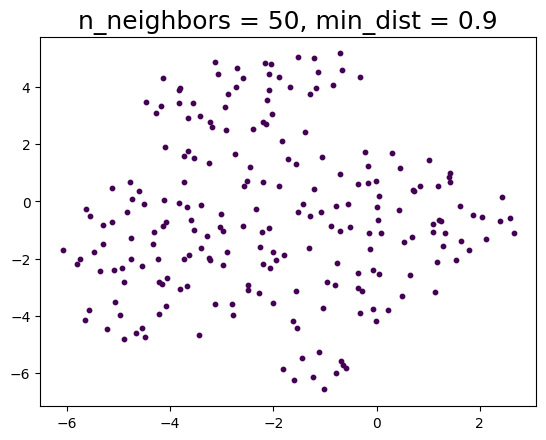

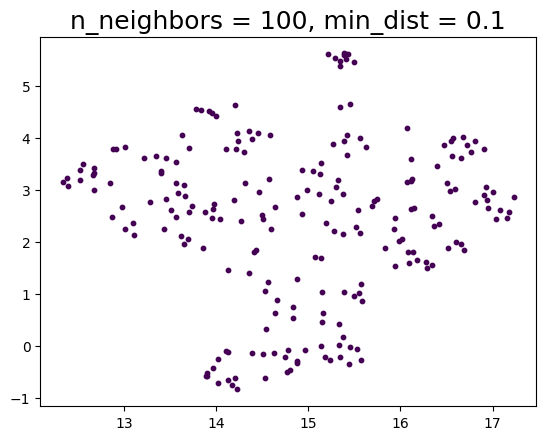

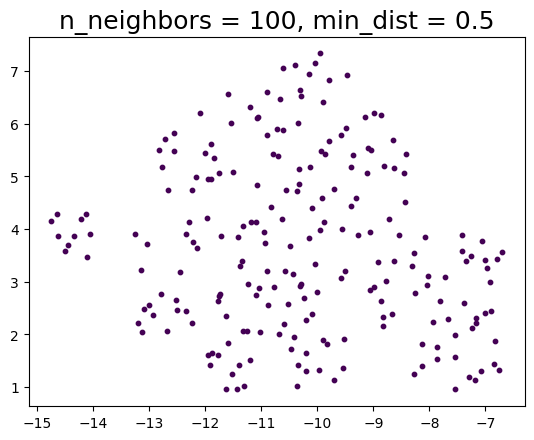

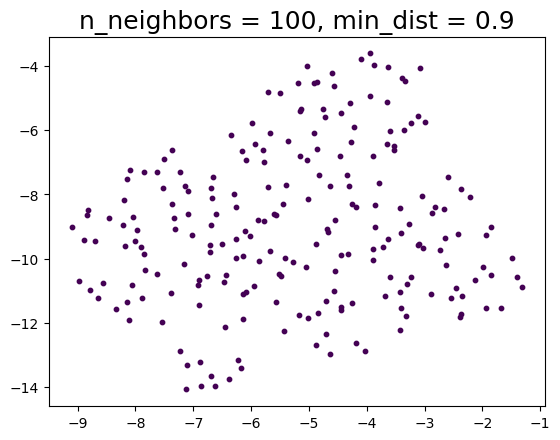

In [6]:
# Choose best parameters
for n in (20, 50, 100):
    for d in (0.1, 0.5, 0.9):
        draw_umap_numericals(n_neighbors=n, min_dist=d, title=f'n_neighbors = {n}, min_dist = {d}')

#### 3.2 Model

In [7]:
# Save mappers
numeric_mapper1 = umap.UMAP(metric='euclidean', n_neighbors=20, min_dist=0.1, n_components=2, random_state=42).fit(X_zuigelingen_numericals)
numeric_mapper2 = umap.UMAP(metric='euclidean', n_neighbors=20, min_dist=0.1, n_components=2, random_state=43).fit(X_zuigelingen_numericals)

<Axes: >

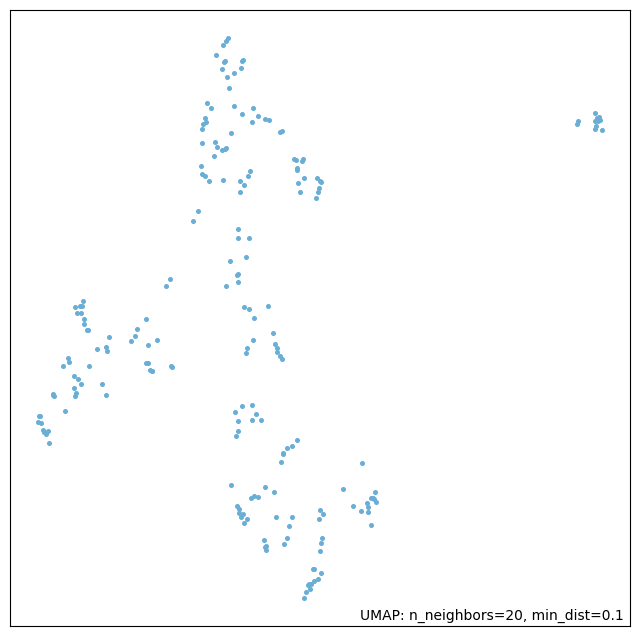

In [8]:
umap.plot.points(numeric_mapper1)

<Axes: >

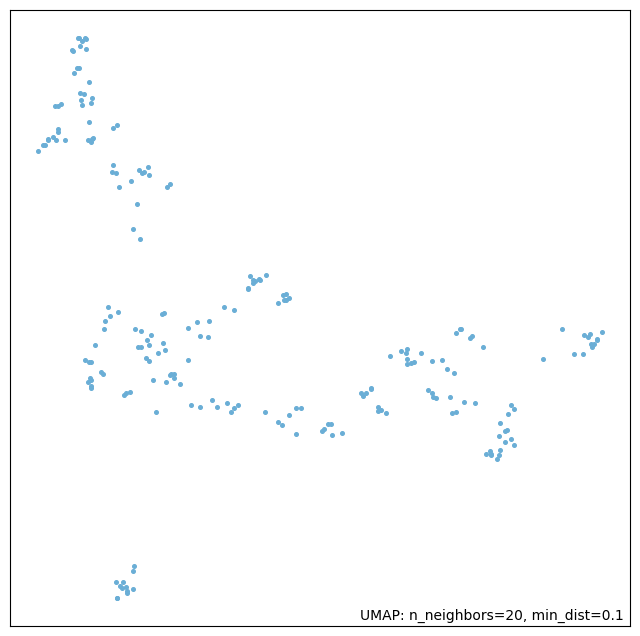

In [9]:
umap.plot.points(numeric_mapper2)

### 4. UMAP - Visualization of boolean space

#### 4.1 Exploration

In [10]:
def draw_umap_booleans(n_neighbors=15, min_dist=0.1, n_components=2, metric='dice', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(X_zuigelingen_booleans)
    fig = plt.figure()
    point_size = 10
    color_code = (0.267004, 0.004874, 0.329415, 1.0)
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), s=point_size, c=[color_code])
    elif n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], s=point_size, c=[color_code])
    elif n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=point_size, c=[color_code])
    plt.title(title, fontsize=18)
    plt.show()

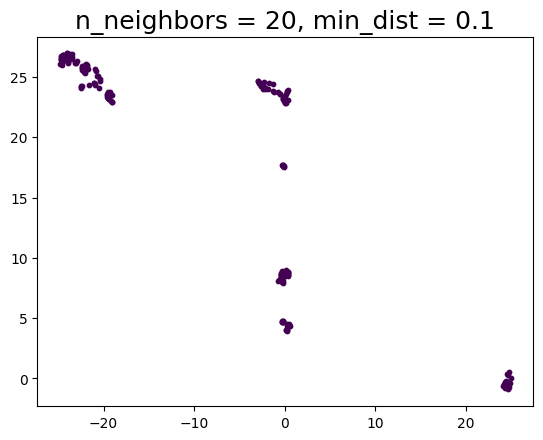

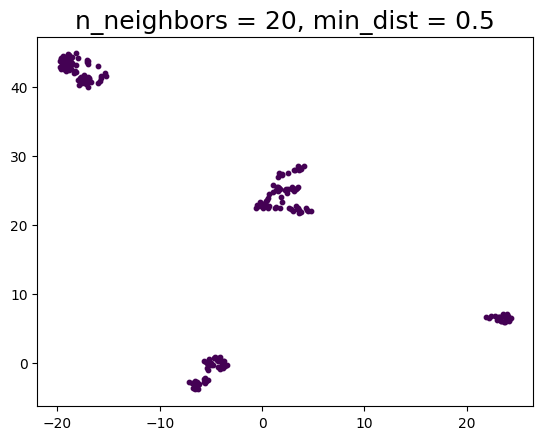

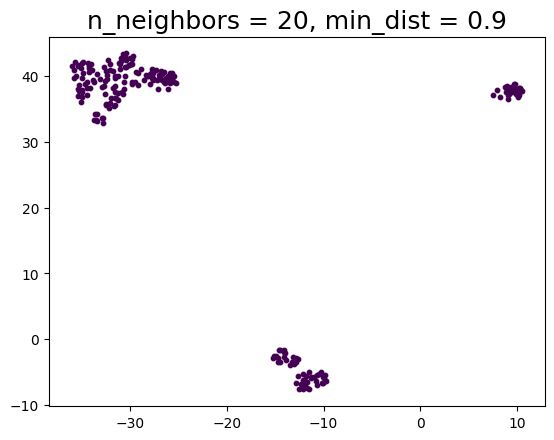

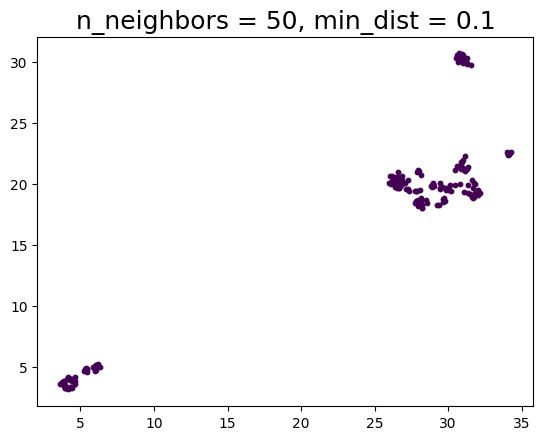

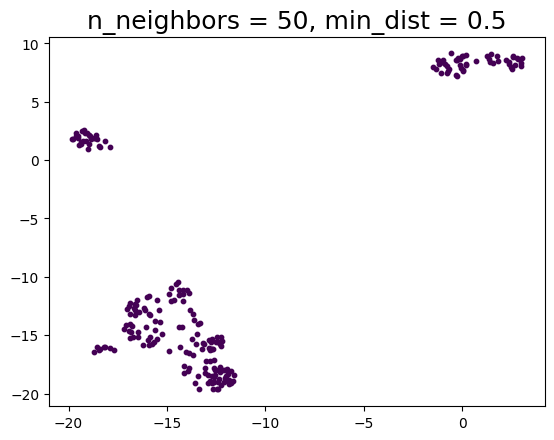

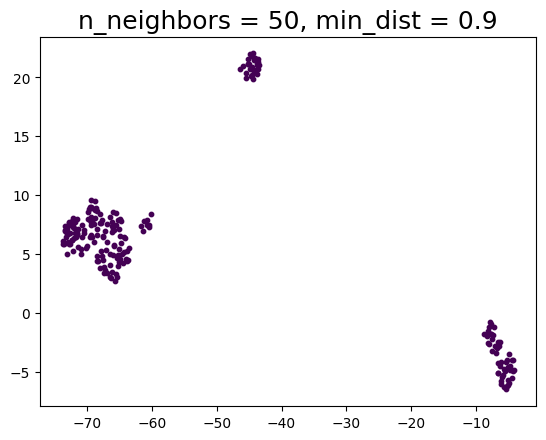

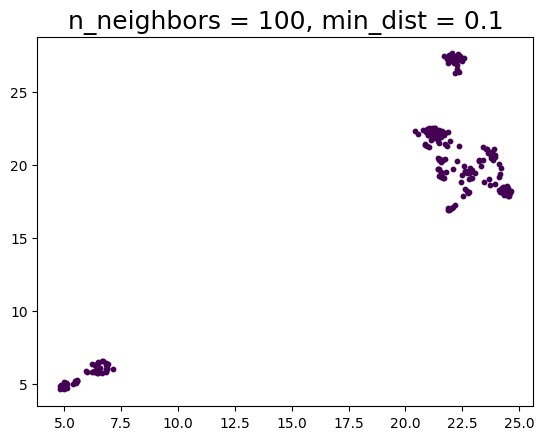

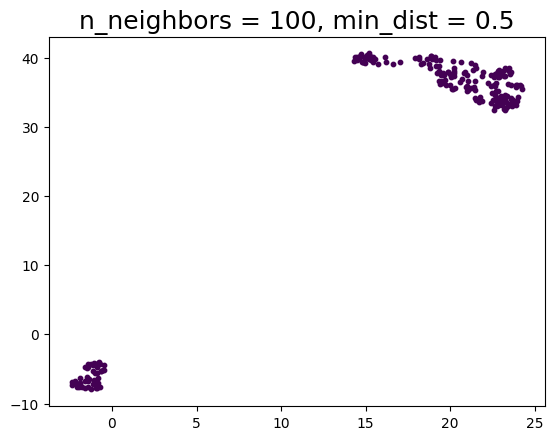

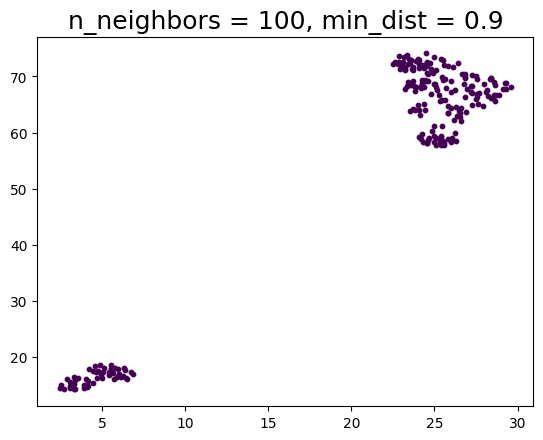

In [11]:
# Choose best parameters
for n in (20, 50, 100):
    for d in (0.1, 0.5, 0.9):
        draw_umap_booleans(n_neighbors=n, min_dist=d, title=f'n_neighbors = {n}, min_dist = {d}')

#### 4.2 Model

In [12]:
# Save mappers
boolean_mapper1 = umap.UMAP(metric='dice', n_neighbors=20, min_dist=0.1, n_components=2, random_state=42).fit(X_zuigelingen_booleans)
boolean_mapper2 = umap.UMAP(metric='dice', n_neighbors=20, min_dist=0.1, n_components=2, random_state=43).fit(X_zuigelingen_booleans)

<Axes: >

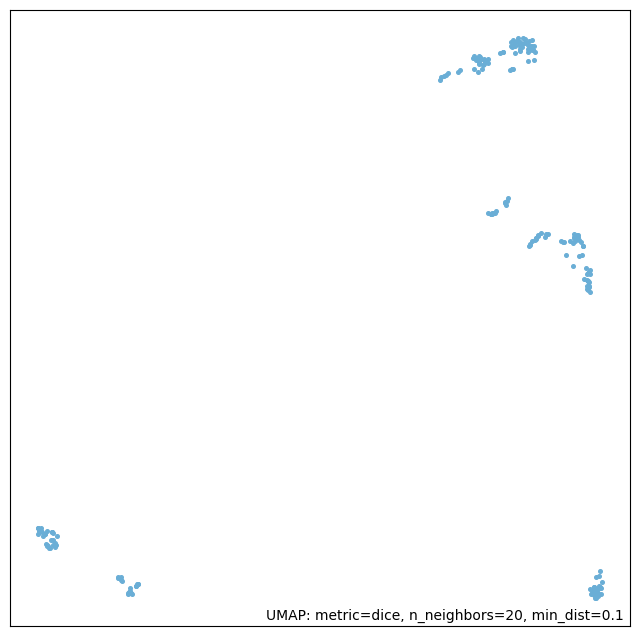

In [13]:
umap.plot.points(boolean_mapper1)

<Axes: >

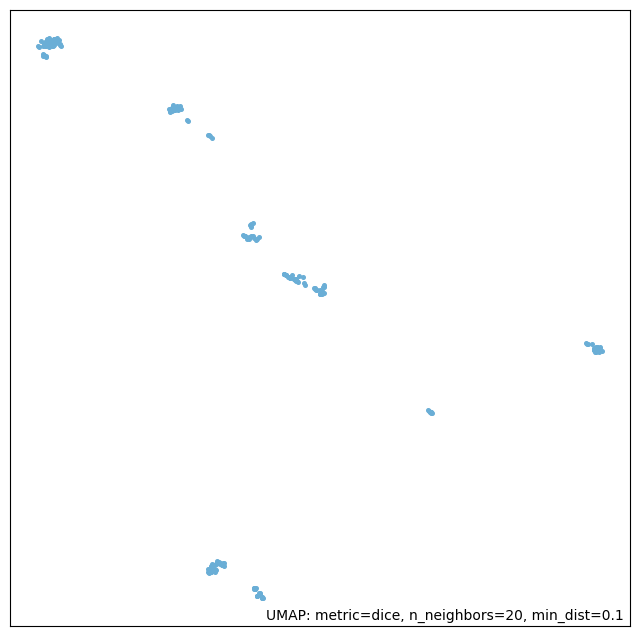

In [14]:
umap.plot.points(boolean_mapper2)

### 5. Combine UMAP models

<Axes: >

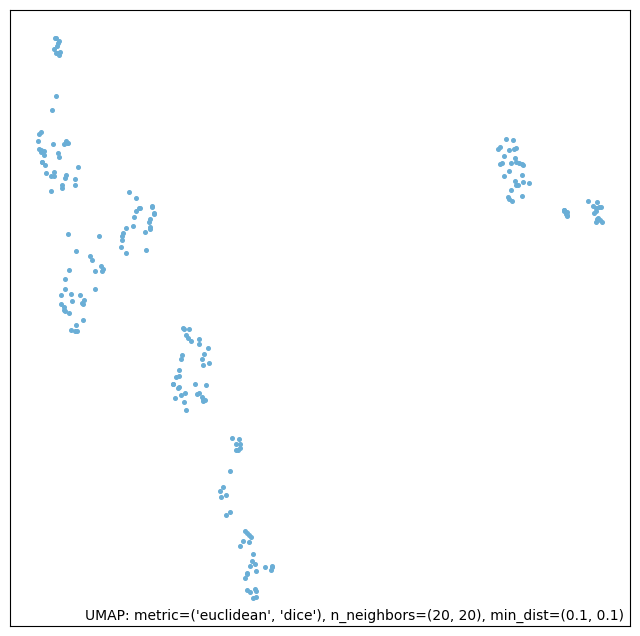

In [15]:
# Plot
intersection_mapper1 = numeric_mapper1 * boolean_mapper1
umap.plot.points(intersection_mapper1)

In [16]:
intersection_embedding1 = intersection_mapper1.embedding_

<Axes: >

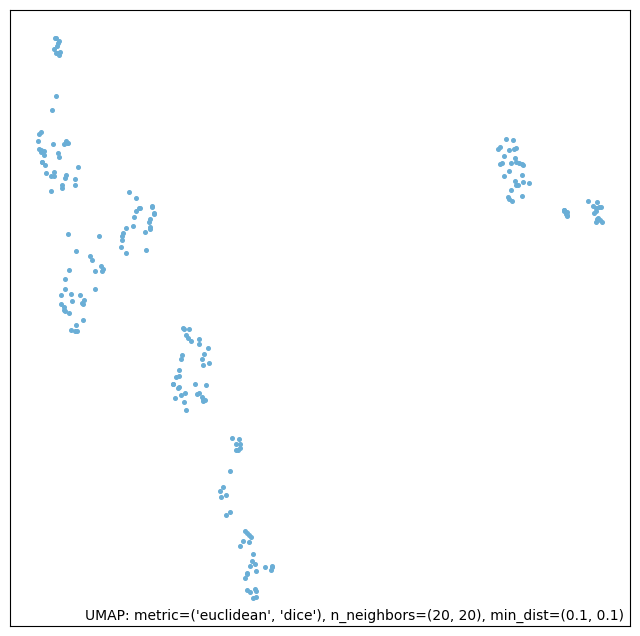

In [17]:
# Plot
intersection_mapper2 = numeric_mapper2 * boolean_mapper2
umap.plot.points(intersection_mapper2)

In [18]:
intersection_embedding2 = intersection_mapper2.embedding_

<Axes: >

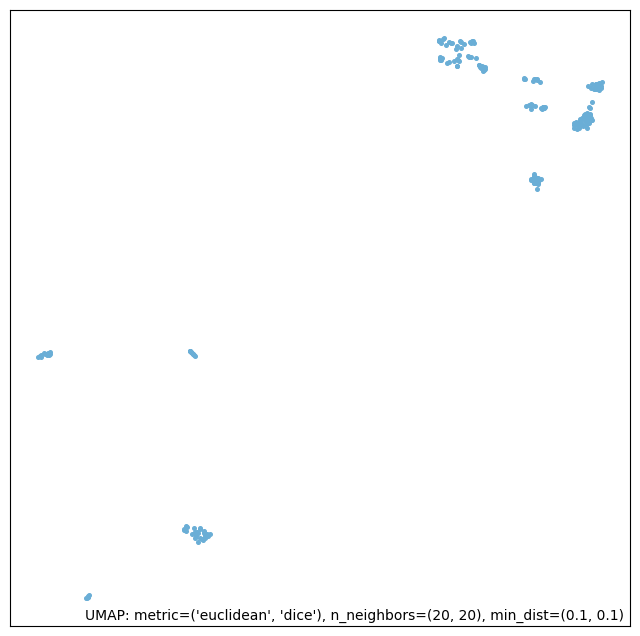

In [19]:
# Plot
union_mapper1 = numeric_mapper1 + boolean_mapper1
umap.plot.points(union_mapper1)

In [20]:
union_embedding1 = union_mapper1.embedding_

<Axes: >

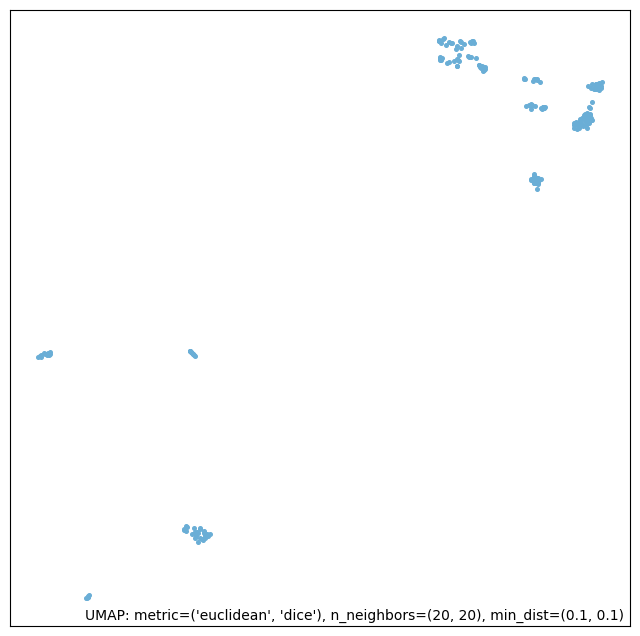

In [21]:
# Plot
union_mapper2 = numeric_mapper2 + boolean_mapper2
umap.plot.points(union_mapper2)

In [22]:
union_embedding2 = union_mapper2.embedding_

### 6. Save as arrays

In [23]:
# Save embeddings
np.save('../4_Data/Arrays/X_zuigelingen_notvaccinated_UMAP2_intersection1.npy', intersection_embedding1)
np.save('../4_Data/Arrays/X_zuigelingen_notvaccinated_UMAP2_intersection2.npy', intersection_embedding2)
np.save('../4_Data/Arrays/X_zuigelingen_notvaccinated_UMAP2_union1.npy', union_embedding1)
np.save('../4_Data/Arrays/X_zuigelingen_notvaccinated_UMAP2_union2.npy', union_embedding2)